In [ ]:
##Ajustar a Taxa de Aprendizado
##Testando aumentar a complexidade do modelo
#mantive as epocas em 20, como na versao 6 e nao 50, como na versao 5


import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds



In [ ]:


# Carregar o dataset de flores
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True, split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'], shuffle_files=True)

# Dividir o dataset em treinamento, validação e teste
train_dataset, val_dataset, test_dataset = dataset




Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Redimensionar imagens
    image = image / 255.0  # Normalizar imagens
    return image, label

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)  # Flip horizontal aleatório
    image = tf.image.random_flip_up_down(image)  # Flip vertical aleatório
    image = tf.image.random_brightness(image, max_delta=0.3)  # Ajuste de brilho aleatório
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)  # Ajuste de contraste aleatório
    return image, label

# Aplicar pré-processamento e aumento de dados no conjunto de treinamento
train_dataset = train_dataset.map(preprocess_image).map(augment_image).batch(32).shuffle(1000)
val_dataset = val_dataset.map(preprocess_image).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)



In [ ]:
for image, label in train_dataset.take(1):
    print(image.shape)  # Deve ser (batch_size, 128, 128, 3)


(32, 128, 128, 3)


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models

# Construir o modelo simplificado
model = models.Sequential([
    layers.Input(shape=[128, 128, 3]),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(info.features['label'].num_classes, activation='softmax')  # Número de classes
])

# Compilar o modelo com uma taxa de aprendizado ajustada
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_dataset,
    epochs=20,  # Aumentar o número de épocas
    validation_data=val_dataset,
    callbacks=[early_stopping]
)



Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.0101 - loss: 4.6752 - val_accuracy: 0.0065 - val_loss: 4.6252
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.0240 - loss: 4.5979 - val_accuracy: 0.0065 - val_loss: 4.6267
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 887ms/step - accuracy: 0.0272 - loss: 4.5468 - val_accuracy: 0.0131 - val_loss: 4.6032
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 956ms/step - accuracy: 0.0254 - loss: 4.5005 - val_accuracy: 0.0065 - val_loss: 4.5791
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 967ms/step - accuracy: 0.0484 - loss: 4.4108 - val_accuracy: 0.0327 - val_loss: 4.5248
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 873ms/step - accuracy: 0.0621 - loss: 4.2892 - val_accuracy: 0.0196 - val_loss: 4.4929
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 964ms/step - accuracy: 0.0816 - loss: 4.2163 - val_accuracy: 0.0196 - val_loss: 4.5217
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.0967 - loss: 4.1433 - val_accuracy: 0.0

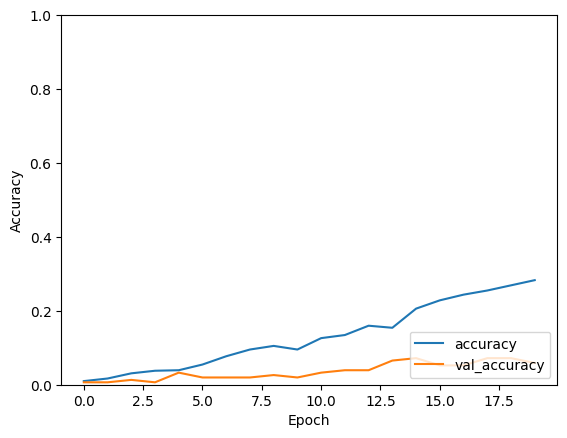

In [ ]:

# Plotar a acurácia
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.0504 - loss: 4.0487
Test accuracy: 0.05882352963089943
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step


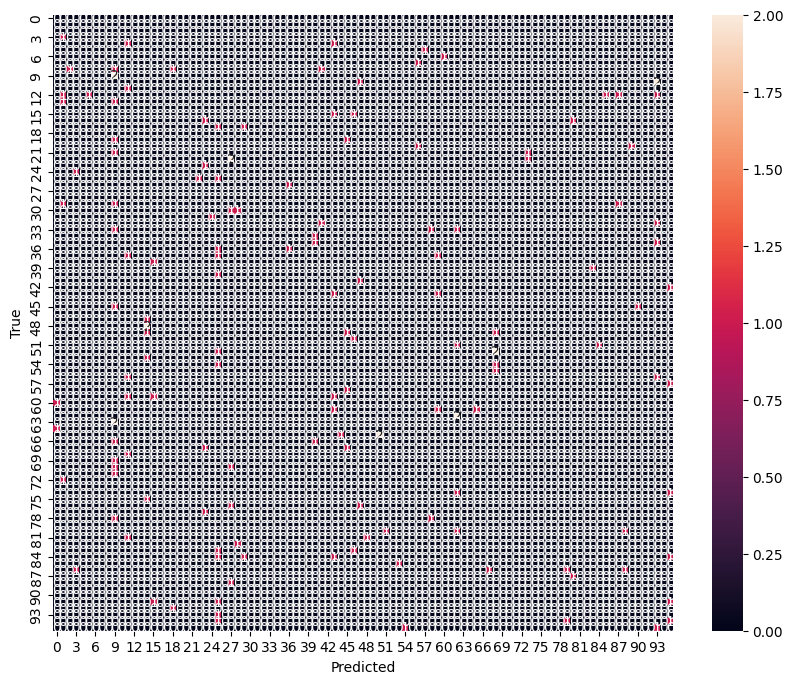

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.12      1.00      0.22         2
          10       0.00      0.00      0.00         3
          11       0.14      1.00      0.25         1
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Gerar predições no conjunto de teste
y_pred = model.predict(test_dataset)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Converter predições para rótulos
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Relatório de classificação
print(classification_report(y_true, y_pred_classes))



In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
# Caminho para a imagem baixada,
image_path = 'image_06602.jpg'

# Prever a classe da imagem
predicted_class = predict_image_class(model, image_path)

# Obter o nome da classe
class_names = info.features['label'].int2str

# Imprimir o resultado
print(f'A classe prevista para a imagem eh: {class_names(predicted_class)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
A classe prevista para a imagem eh: grape hyacinth
